In [1]:
import pandas as pd 
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import joblib as jb
from joblib import dump
import sklearn.impute as ski
import warnings
warnings.filterwarnings("ignore")


archivo = 'data.csv'
ufc = pd.read_csv(archivo)

***PRE-PROCESAMIENTO***

In [2]:
ufc_n = ufc.select_dtypes(include=['float'])
print(ufc_n.shape)
set_option('precision',2)
ufc_n = ufc_n.copy()
ufc_n.head()

(5144, 134)


,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0.0,4.0,0.0,9.20,6.00,0.20,0.00,62.60,20.60,2.60,...,4.0,2.0,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0
1,0.0,3.0,0.0,14.60,9.10,11.80,7.30,124.70,42.10,2.40,...,2.0,0.0,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0
2,0.0,3.0,0.0,15.35,11.32,6.74,4.39,84.74,38.58,5.52,...,3.0,3.0,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0
3,0.0,4.0,0.0,17.00,14.00,13.75,11.00,109.50,48.75,13.00,...,4.0,1.0,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0
4,0.0,1.0,0.0,17.00,14.50,2.50,2.00,201.00,59.50,0.00,...,1.0,2.0,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0


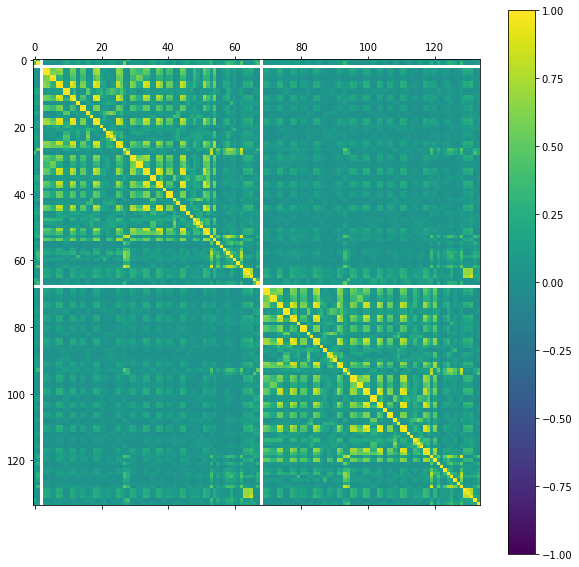

In [3]:
corr_matrix = ufc_n.corr(method='pearson').abs()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax  = ax.matshow(corr_matrix,vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()

In [4]:
ganador = list(ufc['Winner'])
ufc_n.insert(134,'Ganador',ganador,True)
ufc_n.head()

,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Ganador
0,0.0,4.0,0.0,9.20,6.00,0.20,0.00,62.60,20.60,2.60,...,2.0,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0,Red
1,0.0,3.0,0.0,14.60,9.10,11.80,7.30,124.70,42.10,2.40,...,0.0,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0,Red
2,0.0,3.0,0.0,15.35,11.32,6.74,4.39,84.74,38.58,5.52,...,3.0,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0,Red
3,0.0,4.0,0.0,17.00,14.00,13.75,11.00,109.50,48.75,13.00,...,1.0,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0,Blue
4,0.0,1.0,0.0,17.00,14.50,2.50,2.00,201.00,59.50,0.00,...,2.0,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0,Blue


In [5]:
col_num = ['R_Weight_lbs','R_Height_cms','B_Height_cms','R_age','B_age','R_Reach_cms','B_Reach_cms']

imp = ski.SimpleImputer(missing_values=np.nan , strategy='median')

for col in col_num:
    imputer_mediana = imp.fit_transform(ufc_n[col].values.reshape(-1,1))
    ufc_n[col] = imputer_mediana

ufc_n = ufc_n[ufc_n['Ganador'] != 'Draw']    
ufc_n = ufc_n.dropna()
ufc_n = ufc_n.copy()
print(ufc_n.isna().sum().sum())
print(ufc_n.shape)

0
(3592, 135)


In [6]:
le = LabelEncoder()
ufc_n['Ganador'] = le.fit_transform(ufc_n.Ganador)
ufc_n.head()

,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Ganador
0,0.0,4.0,0.0,9.20,6.00,0.20,0.00,62.60,20.60,2.60,...,2.0,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0,1
1,0.0,3.0,0.0,14.60,9.10,11.80,7.30,124.70,42.10,2.40,...,0.0,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0,1
2,0.0,3.0,0.0,15.35,11.32,6.74,4.39,84.74,38.58,5.52,...,3.0,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0,1
3,0.0,4.0,0.0,17.00,14.00,13.75,11.00,109.50,48.75,13.00,...,1.0,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0,0
4,0.0,1.0,0.0,17.00,14.50,2.50,2.00,201.00,59.50,0.00,...,2.0,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0,0


***EVALUACIÓN ALGORITMOS***

In [7]:
array = ufc_n.values
x = array[:,:134]
Y = array[:,134]
Y=Y.astype('int')
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx = scaler.fit_transform(x)
X= rescaledx
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2514, 134)
(2514,)
(1078, 134)
(1078,)


In [9]:
modelos = []
modelos.append(('LR', LogisticRegression(solver='lbfgs', max_iter=500)))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))

In [10]:
resultados = []
nombres = []
scoring = 'accuracy'
for nombre, modelo in modelos:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(modelo, X_train, Y_train, cv=kfold, scoring=scoring)
	resultados.append(cv_results)
	nombres.append(nombre)
	msg = "%s: %f (%f)" % (nombre, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.681792 (0.029377)
LDA: 0.676632 (0.037734)
KNN: 0.625356 (0.037847)
CART: 0.600275 (0.038256)
NB: 0.599892 (0.048737)
SVM: 0.681800 (0.034622)


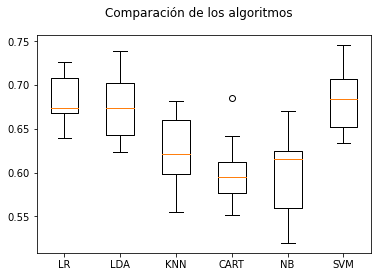

In [11]:
fig = plt.figure()
fig.suptitle('Comparación de los algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

***RECORDEMOS QUE HEMOS CODIFICADO EL COLOR DEL LUCHADOR COMO:***

1-->ROJO


0-->AZUL

***Escogemos los 3 algoritmos con mejor precisión para medir su curva ROC-AUC***

***LogisiticRegression***

[Text(0, 0.5, 'Azul'), Text(0, 1.5, 'Rojo')]

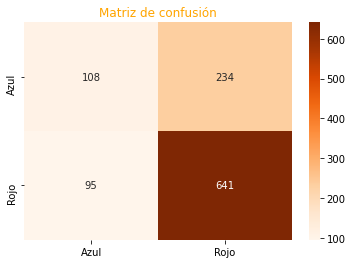

In [12]:
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
cm = confusion_matrix(Y_test, lr_pred) 
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d" ,cmap='Oranges')
ax.set_title("Matriz de confusión", color='orange')
ax.xaxis.set_ticklabels(['Azul', 'Rojo'])
ax.yaxis.set_ticklabels(['Azul', 'Rojo'])

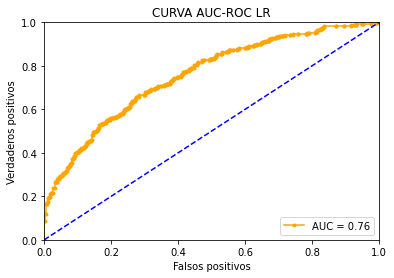

In [13]:
lr.fit(X_test,Y_test)
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('CURVA AUC-ROC LR')
plt.plot(fpr, tpr, 'orange',marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.show()

In [14]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.53      0.32      0.40       342
           1       0.73      0.87      0.80       736

    accuracy                           0.69      1078
   macro avg       0.63      0.59      0.60      1078
weighted avg       0.67      0.69      0.67      1078



***LinearDiscriminantAnalysis***

[Text(0, 0.5, 'Azul'), Text(0, 1.5, 'Rojo')]

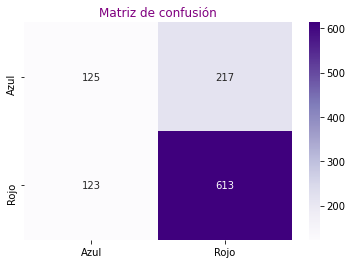

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
lda_pred = lda.predict(X_test)
cm = confusion_matrix(Y_test, lda_pred) 
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d" ,cmap='Purples')
ax.set_title("Matriz de confusión", color='purple')
ax.xaxis.set_ticklabels(['Azul', 'Rojo'])
ax.yaxis.set_ticklabels(['Azul', 'Rojo'])

In [16]:
print(classification_report(Y_test,lda_pred))

              precision    recall  f1-score   support

           0       0.50      0.37      0.42       342
           1       0.74      0.83      0.78       736

    accuracy                           0.68      1078
   macro avg       0.62      0.60      0.60      1078
weighted avg       0.66      0.68      0.67      1078



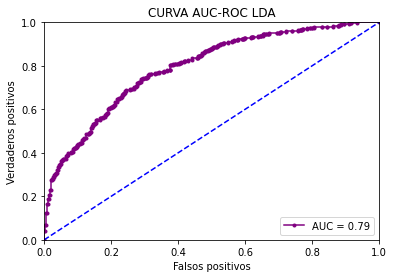

In [17]:
lda.fit(X_test,Y_test)
probs = lda.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('CURVA AUC-ROC LDA')
plt.plot(fpr, tpr, 'purple',marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.show()

***SupportVectorMachines***

[Text(0, 0.5, 'Azul'), Text(0, 1.5, 'Rojo')]

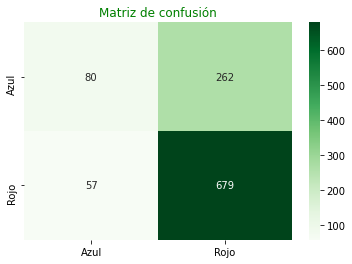

In [18]:
svc = SVC(gamma='scale', probability=True)
svc.fit(X_train,Y_train)
svc_pred = svc.predict(X_test)
cm = confusion_matrix(Y_test, svc_pred) 
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d" ,cmap='Greens')
ax.set_title("Matriz de confusión", color='Green')
ax.xaxis.set_ticklabels(['Azul', 'Rojo'])
ax.yaxis.set_ticklabels(['Azul', 'Rojo'])

In [19]:
print(classification_report(Y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.58      0.23      0.33       342
           1       0.72      0.92      0.81       736

    accuracy                           0.70      1078
   macro avg       0.65      0.58      0.57      1078
weighted avg       0.68      0.70      0.66      1078



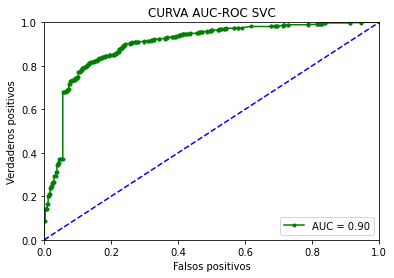

In [20]:
svc.fit(X_test,Y_test)
probs = svc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('CURVA AUC-ROC SVC')
plt.plot(fpr, tpr, 'green',marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.show()

***ESCOGEMOS EL MODELO QUE MEJOR PRESTACIONES NOS DA PARA MEJORARLO(TUNNING) Y GUARDAR EL MODELO***

In [21]:
model = SVC() 
model.fit(X_train, Y_train) 
predictions = model.predict(X_test) 


In [22]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  

grid_result = grid.fit(X_train, Y_train) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.653938 (0.000276) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.680192 (0.005315) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.660698 (0.004259) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.662688 (0.017138) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.669456 (0.007488) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.661096 (0.006355) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.653938 (0.000276) with: {'C': 10, 'gamma': 0.0001, 

In [23]:
print(grid_result.best_score_)
print(grid.best_params_) 
print(grid.best_estimator_) 

0.6801921538498095
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [31]:
modelo = SVC(C=1, gamma=1 , kernel='rbf')
fichero_modeloJoblib = 'modeloUFC_finalizado_joblib.sav'
dump(modelo, fichero_modeloJoblib)

['modeloUFC_finalizado_joblib.sav']

In [ ]:
modelo_cargado = load(fichero_modeloJoblib)
resultado = modelo_cargado.score(X_test, Y_test)
print("Resultado: " + str(resultado))
